# Bank dataset

Many companies directs marketing campaings to all their leads. However, the effect of this campaings could be different from one potencial customer to other. So, what if marketing teams could have the possibility to predict which customer will buy from the mass of clients???

well, in this analysis we try to create a model that allow us to predict who is going to buy a bank service and who is not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv("bank.csv",sep=";")
dataset2 = pd.read_csv("bank.csv",sep=";")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
dataset.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [ ]:
for i in range(dataset.shape[0]):
  if dataset["y"][i] == "yes":
    dataset["y"][i] = 1
  if dataset["y"][i] == "no":
    dataset["y"][i] = 0  
dataset.head()
dataset = dataset.drop(columns="y2")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [ ]:
dataset.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
dataset.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
dataset["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

### There are 3 types of basic education in dataset: "basic.9y", "basic.6y" and "basic.4y". Let's grouped in an unique label: "Basic" 

In [36]:
dataset["education"] = np.where(dataset['education']=="basic.9y","Basic",dataset["education"])
dataset["education"] = np.where(dataset['education']=="basic.6y","Basic",dataset["education"])
dataset["education"] = np.where(dataset['education']=="basic.4y","Basic",dataset["education"])
dataset["education"] = np.where(dataset['education']=="high.school","High School",dataset["education"])
dataset["education"] = np.where(dataset['education']=="professional.course","Professional Course",dataset["education"])
dataset["education"] = np.where(dataset['education']=="university.degree","University Degree",dataset["education"])
dataset["education"] = np.where(dataset['education']=="illiterate","Illiterate",dataset["education"])
dataset["education"] = np.where(dataset['education']=="unknown","Unknown",dataset["education"])
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [37]:
dataset["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [38]:
dataset["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [39]:
dataset.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


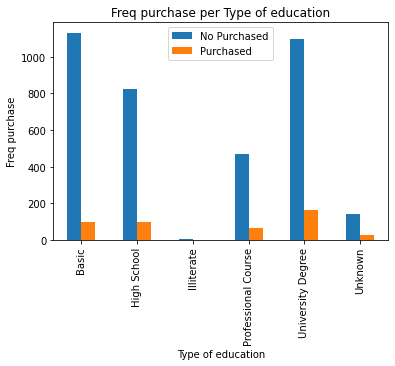

In [52]:
pd.crosstab(dataset["education"], dataset["y"]).plot(kind="bar")
plt.title("Freq purchase per Type of education")
plt.xlabel("Type of education")
plt.ylabel("Freq purchase")
plt.legend(["No Purchased","Purchased"])


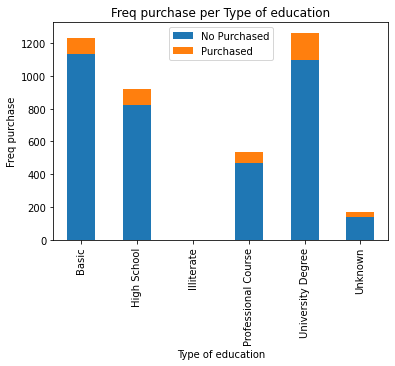

In [53]:
pd.crosstab(dataset["education"], dataset["y"]).plot(kind="bar", stacked=True)
plt.title("Freq purchase per Type of education")
plt.xlabel("Type of education")
plt.ylabel("Freq purchase")
plt.legend(["No Purchased","Purchased"])

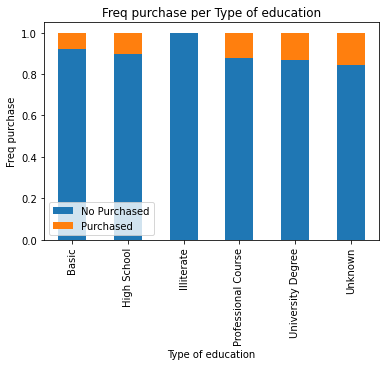

In [55]:
table = pd.crosstab(dataset["education"], dataset["y"])
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.title("Freq purchase per Type of education")
plt.xlabel("Type of education")
plt.ylabel("Freq purchase")
plt.legend(["No Purchased","Purchased"])

#### Let's create dummy features from categorical columns

In [56]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [57]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome']

In [58]:
for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummy = pd.get_dummies(dataset[category],prefix=cat_list)
    dataset = dataset.join(cat_dummy)

In [59]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cat_job_admin.,cat_job_blue-collar,cat_job_entrepreneur,cat_job_housemaid,cat_job_management,cat_job_retired,cat_job_self-employed,cat_job_services,cat_job_student,cat_job_technician,cat_job_unemployed,cat_job_unknown,cat_marital_divorced,cat_marital_married,cat_marital_single,cat_marital_unknown,cat_education_Basic,cat_education_High School,cat_education_Illiterate,cat_education_Professional Course,cat_education_University Degree,cat_education_Unknown,cat_default_no,cat_default_unknown,cat_default_yes,cat_housing_no,cat_housing_unknown,cat_housing_yes,cat_loan_no,cat_loan_unknown,cat_loan_yes,cat_contact_cellular,cat_contact_telephone,cat_month_apr,cat_month_aug,cat_month_dec,cat_month_jul,cat_month_jun,cat_month_mar,cat_month_may,cat_month_nov,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [60]:
categories_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week','poutcome']
all_categories = dataset.columns.values.tolist()

In [61]:
categories_to_keep = [v for v in all_categories if v not in categories_to_drop]

In [62]:
categories_to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'cat_job_admin.',
 'cat_job_blue-collar',
 'cat_job_entrepreneur',
 'cat_job_housemaid',
 'cat_job_management',
 'cat_job_retired',
 'cat_job_self-employed',
 'cat_job_services',
 'cat_job_student',
 'cat_job_technician',
 'cat_job_unemployed',
 'cat_job_unknown',
 'cat_marital_divorced',
 'cat_marital_married',
 'cat_marital_single',
 'cat_marital_unknown',
 'cat_education_Basic',
 'cat_education_High School',
 'cat_education_Illiterate',
 'cat_education_Professional Course',
 'cat_education_University Degree',
 'cat_education_Unknown',
 'cat_default_no',
 'cat_default_unknown',
 'cat_default_yes',
 'cat_housing_no',
 'cat_housing_unknown',
 'cat_housing_yes',
 'cat_loan_no',
 'cat_loan_unknown',
 'cat_loan_yes',
 'cat_contact_cellular',
 'cat_contact_telephone',
 'cat_month_apr',
 'cat_month_aug',
 'cat_month_dec',
 'cat_month_jul',
 'cat

In [63]:
new_dataset = dataset[categories_to_keep]

In [64]:
new_dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cat_job_admin.,cat_job_blue-collar,cat_job_entrepreneur,cat_job_housemaid,cat_job_management,cat_job_retired,cat_job_self-employed,cat_job_services,cat_job_student,cat_job_technician,cat_job_unemployed,cat_job_unknown,cat_marital_divorced,cat_marital_married,cat_marital_single,cat_marital_unknown,cat_education_Basic,cat_education_High School,cat_education_Illiterate,cat_education_Professional Course,cat_education_University Degree,cat_education_Unknown,cat_default_no,cat_default_unknown,cat_default_yes,cat_housing_no,cat_housing_unknown,cat_housing_yes,cat_loan_no,cat_loan_unknown,cat_loan_yes,cat_contact_cellular,cat_contact_telephone,cat_month_apr,cat_month_aug,cat_month_dec,cat_month_jul,cat_month_jun,cat_month_mar,cat_month_may,cat_month_nov,cat_month_oct,cat_month_sep,cat_day_of_week_fri,cat_day_of_week_mon,cat_day_of_week_thu,cat_day_of_week_tue,cat_day_of_week_wed,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


### Let´s separate dependant variable "y" from dataset

In [65]:
Y = ["y"]
X_categories = [v for v in categories_to_keep if v not in Y]

In [66]:
X = new_dataset[X_categories]
Y = new_dataset["y"]

In [67]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_marital_divorced', 'cat_marital_married', 'cat_marital_single',
       'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course', 'cat_education_University Degree',
       'cat_education_Unknown', 'cat_default_no', 'cat_default_unknown',
       'cat_default_yes', 'cat_housing_no', 'cat_housing_unknown',
       'cat_housing_yes', 'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat

### Let's use ScikitLearn to evaluate 12 most representative independant variables to the model

In [68]:
n = 12

In [69]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [84]:
selector = RFE(lr, 12)
selector = selector.fit(X,Y.astype(int))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [85]:
selector.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True])

In [86]:
selector.ranking_

array([45, 43, 19, 44, 47, 14, 26, 23,  1, 38,  3, 11,  7, 42, 12,  1,  8,
       27,  1,  2,  1, 46, 18, 34, 32, 49, 17, 15, 48, 24, 36,  6, 35, 37,
       50, 10, 20, 30, 16, 22, 31,  9,  5, 39, 21,  1,  1,  1,  1,  1, 25,
       28,  4, 40, 33, 29, 41, 13,  1,  1,  1])

In [88]:
z = zip(X_categories,selector.support_)
list(z)

[('age', False),
 ('duration', False),
 ('campaign', False),
 ('pdays', False),
 ('previous', False),
 ('emp.var.rate', False),
 ('cons.price.idx', False),
 ('cons.conf.idx', False),
 ('euribor3m', True),
 ('nr.employed', False),
 ('cat_job_admin.', False),
 ('cat_job_blue-collar', False),
 ('cat_job_entrepreneur', False),
 ('cat_job_housemaid', False),
 ('cat_job_management', False),
 ('cat_job_retired', True),
 ('cat_job_self-employed', False),
 ('cat_job_services', False),
 ('cat_job_student', True),
 ('cat_job_technician', False),
 ('cat_job_unemployed', True),
 ('cat_job_unknown', False),
 ('cat_marital_divorced', False),
 ('cat_marital_married', False),
 ('cat_marital_single', False),
 ('cat_marital_unknown', False),
 ('cat_education_Basic', False),
 ('cat_education_High School', False),
 ('cat_education_Illiterate', False),
 ('cat_education_Professional Course', False),
 ('cat_education_University Degree', False),
 ('cat_education_Unknown', False),
 ('cat_default_no', False),
 (

In [101]:
indexes = []
for i in range(len(selector.support_)):
  if selector.support_[i] == True:
    indexes.append(X.columns.values[i])

In [105]:
X = X[indexes]
X.head()

,euribor3m,cat_job_retired,cat_job_student,cat_job_unemployed,cat_month_dec,cat_month_jul,cat_month_jun,cat_month_mar,cat_month_may,cat_poutcome_failure,cat_poutcome_nonexistent,cat_poutcome_success
0,1.313,0,0,0,0,0,0,0,1,0,1,0
1,4.855,0,0,0,0,0,0,0,1,0,1,0
2,4.962,0,0,0,0,0,1,0,0,0,1,0
3,4.959,0,0,0,0,0,1,0,0,0,1,0
4,4.191,0,0,0,0,0,0,0,0,0,1,0


## Logistic regression model

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [244]:
lr.fit(X_train,Y_train.astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
lr.score(X_train,Y_train.astype(int))

0.9032258064516129

In [246]:
lr.score(X_test,Y_test.astype(int))

0.8980582524271845

In [247]:
from sklearn.metrics import log_loss
log_loss(Y_test.astype(int),lr.predict(X_test))

3.5209496939587774

In [248]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.astype(int),lr.predict(X_test))

0.8980582524271845

In [249]:
probabilities = lr.predict_proba(X_test)

In [250]:
probabilities[0]

array([0.93758804, 0.06241196])

In [251]:
probabilities_df = pd.DataFrame(probabilities[:,1])
threshold = 0.7
probabilities_df["predictions"]=np.where(probabilities_df[0]>threshold,1,0)

In [252]:
probabilities_df.head()

,0,predictions
0,0.062412,0
1,0.176570,0
2,0.057998,0
3,0.058134,0
4,0.041799,0


In [253]:
probabilities_df.columns

Index([0, 'predictions'], dtype='object')

In [254]:
pd.crosstab(probabilities_df["predictions"],columns="count")

col_0,count
predictions,
0,1223
1,13


### Cross Validation
Let's apply a 10-fold cross validation and check results

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

scores = cross_val_score(linear_model.LogisticRegression(),X, Y.astype(int),scoring = "accuracy",cv=10)

In [166]:
scores

array([0.91990291, 0.90048544, 0.90291262, 0.89563107, 0.90533981,
       0.90048544, 0.88834951, 0.90048544, 0.90048544, 0.90024331])

In [167]:
scores.mean()

0.9014320978905346

In [170]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(linear_model.LogisticRegression(),X, Y.astype(int),scoring = "accuracy",cv=loo)


In [171]:
scores.mean()

0.9002184996358339

In [179]:
from sklearn.model_selection import cross_val_predict
ypred = cross_val_predict(linear_model.LogisticRegression(),X,Y.astype(int),cv=10)


### Confusion matrix & ROC curves

In [255]:
probs = lr.predict_proba(X_test)

In [256]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.3

In [257]:
prob_df["Predictions"]=np.where(prob_df[0]>=threshold,1,0)
prob_df["Actual"]=list(Y_test)
prob_df.head()

,0,Predictions,Actual
0,0.062412,0,0
1,0.176570,0,0
2,0.057998,0,0
3,0.058134,0,0
4,0.041799,0,0


In [258]:
crosstab = pd.crosstab(prob_df.Predictions,prob_df.Actual)
crosstab

Actual,0,1
Predictions,,
0,1063,92
1,33,48


In [259]:
TP = crosstab[1][1]
TN = crosstab[0][0]
FP = crosstab[0][1]
FN = crosstab[1][0]
print(f"True positive {TP}")
print(f"True negative {TN}")
print(f"False positive {FP}")
print(f"False negative {FN}")

True positive 48
True negative 1063
False positive 33
False negative 92


In [260]:
Sensitivity = TP/(TP+FN)
Sensitivity

0.34285714285714286

In [261]:
Espec_1 = 1 - TN/(TN+FP)
Espec_1

0.030109489051094895

In [277]:
threshold = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8]
Sensitivities=[1]
Specifities_1 = [1]
for t in threshold:
    prob_df["Predictions"]=np.where(prob_df[0]>=t,1,0)
    prob_df["Actual"]=list(Y_test)
    crosstab = pd.crosstab(prob_df["Predictions"],prob_df["Actual"])
    TP = crosstab[1][1]
    TN = crosstab[0][0]
    FP = crosstab[0][1]
    FN = crosstab[1][0]
    Sensitivity = TP/(TP+FN)
    Sensitivities.append(Sensitivity)
    Espec_1 = 1 - TN/(TN+FP)
    Specifities_1.append(Espec_1)
Sensitivities.append(0)
Specifities_1.append(0)


In [278]:
Sensitivities

[1,
 0.9142857142857143,
 0.7,
 0.6,
 0.34285714285714286,
 0.17142857142857143,
 0.06428571428571428,
 0.02857142857142857,
 0]

In [279]:
Specifities_1

[1,
 0.6642335766423357,
 0.24361313868613144,
 0.1140510948905109,
 0.030109489051094895,
 0.009124087591240837,
 0.0036496350364964014,
 0.0,
 0]

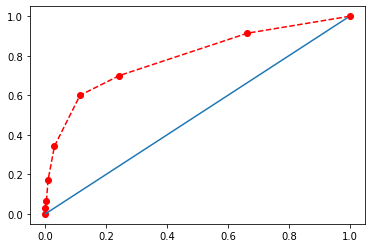

In [299]:
plt.plot(Specifities_1, Sensitivities, marker="o", color = "r", linestyle="--")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)


#### Implementando curvas ROC con Scikit learn

Text(0.5, 1.0, 'ROC Curve')

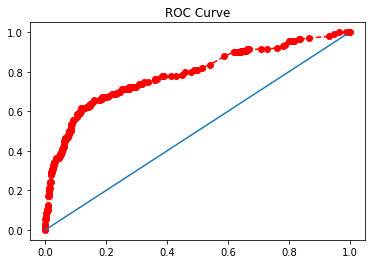

In [307]:
from sklearn import metrics
import matplotlib.pyplot as plt
Specif_1_sk, Sensi_sk, _ = metrics.roc_curve(Y_test.astype(int),prob, pos_label=1)
plt.plot(Specif_1_sk, Sensi_sk, marker="o", color = "r", linestyle="--")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.title("ROC Curve")